## Data visualisation Drosophila melanogaster - larvas' behavioral tests
- elav - control line
- elavxCG4190 - RNAi line

### data generated randomly using normal distribution

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
from scipy import stats
import scipy.stats as stats
import numpy as np
import seaborn as sns
import glob
import numpy as np
from numpy import random

In [2]:
# code
def load_csv(file_path):
    return pd.read_csv(file_path, index_col=None, sep=",")
     
def calculate_crawling_distance(x, y):
    return (x**2 + y**2)**(1/2)

def plots(kind):
    
    fig = plt.figure(figsize=(10,10))
    
    axes = fig.subplots(2, 2).flatten()
    for i, y in enumerate(exp):
        p = sns.catplot(data=means, x="line", y=y, kind=kind, ax=axes[i], palette=palette, order=["elav", "elavxCG4190"] )
        plt.close(p.fig)

In [3]:
csv = pd.read_csv("elva-summary.csv")
csv["peristaltic movements per 30 seconds"] = csv[["p1", "p2", "p3"]].mean(axis=1)
csv["number of reorientation points"] = csv[["r1", "r2", "r3"]].mean(axis=1)
csv["righting time"] = csv[["o1", "o2", "o3"]].mean(axis=1)


def process(row):
    return np.mean([
        calculate_crawling_distance(row["d1x"], row["d1y"]),
        calculate_crawling_distance(row["d2x"], row["d2y"]),
        calculate_crawling_distance(row["d3x"], row["d3y"])])
    
csv["distance [mm]"] = csv.apply(process, axis=1)

In [4]:
means = csv[["line", "peristaltic movements per 30 seconds", "number of reorientation points", "righting time", "distance [mm]"]]

means.head()

,line,peristaltic movements per 30 seconds,number of reorientation points,righting time,distance [mm]
0,elavxCG4190,21.666667,3.000000,39.666667,11.944668
1,elavxCG4190,14.000000,2.666667,30.000000,8.047379
2,elavxCG4190,17.333333,2.333333,37.333333,8.047379
3,elavxCG4190,20.000000,4.000000,17.000000,5.276984
4,elavxCG4190,20.333333,2.333333,14.666667,14.047379


/usr/local/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3720: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try barplot
  warnings.warn(msg, UserWarning)
/usr/local/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3720: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try barplot
  warnings.warn(msg, UserWarning)
/usr/local/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3720: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try barplot
  warnings.warn(msg, UserWarning)
/usr/local/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3720: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try barplot
  warnings.warn(msg, UserWarning)


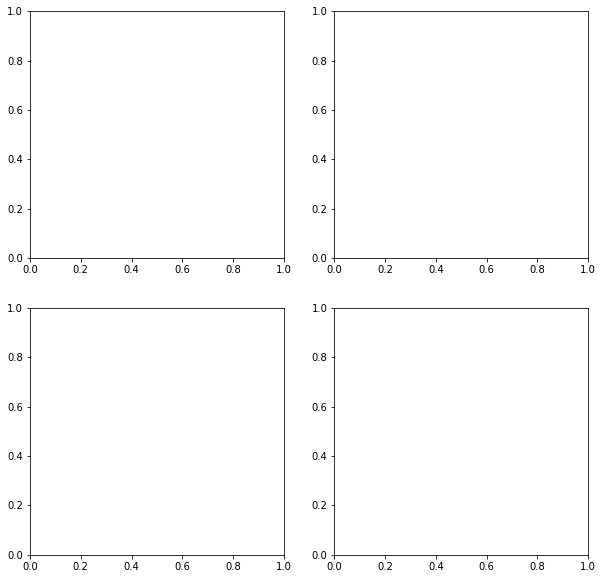

In [5]:
exp = ["peristaltic movements per 30 seconds", "number of reorientation points", "righting time", "distance [mm]"]
palette = ["#9b59b6", "#95a5a6"]

plots("bar")
#plt.savefig("behavioral_tests_plot-elav")

/usr/local/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3720: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try boxplot
  warnings.warn(msg, UserWarning)
/usr/local/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3720: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try boxplot
  warnings.warn(msg, UserWarning)
/usr/local/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3720: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try boxplot
  warnings.warn(msg, UserWarning)
/usr/local/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3720: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try boxplot
  warnings.warn(msg, UserWarning)


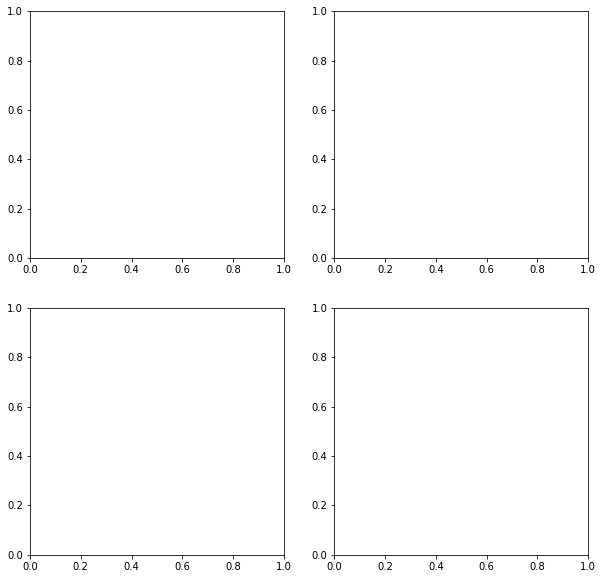

In [6]:
plots("box")
 #plt.savefig("behavioral_tests_box-elav")

In [7]:

for i in exp:
    print( "Experiment: " + str(i))
    print("P-value: " + str(ttest_ind(means.loc[0:45, i],
          means.loc[45:, i])[1]) + "\n")


Experiment: peristaltic movements per 30 seconds
P-value: 0.5427362402159632

Experiment: number of reorientation points
P-value: 4.770718433107905e-05

Experiment: righting time
P-value: 0.0033856955135236197

Experiment: distance [mm]
P-value: 0.2932215504516367



# Corelation between experiments for each individual

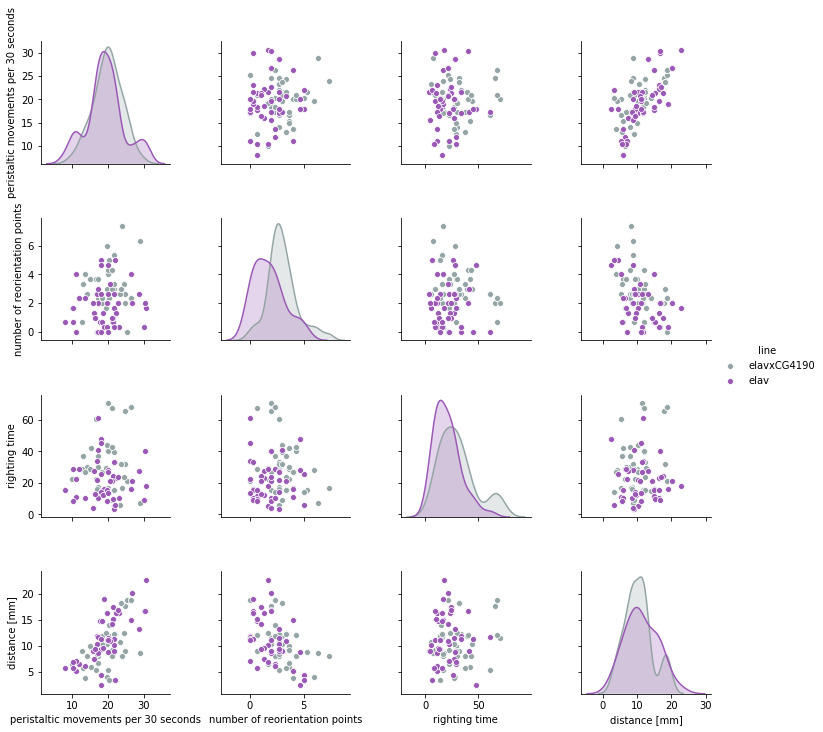

In [8]:
palette_reversed = ["#95a5a6", "#9b59b6"]
#sns.pairplot(means, hue="line", kind="reg", palette=palette)
sns.pairplot(means, hue="line", palette=palette_reversed);

# plt.savefig("behavioral_tests_dependencies_elav")

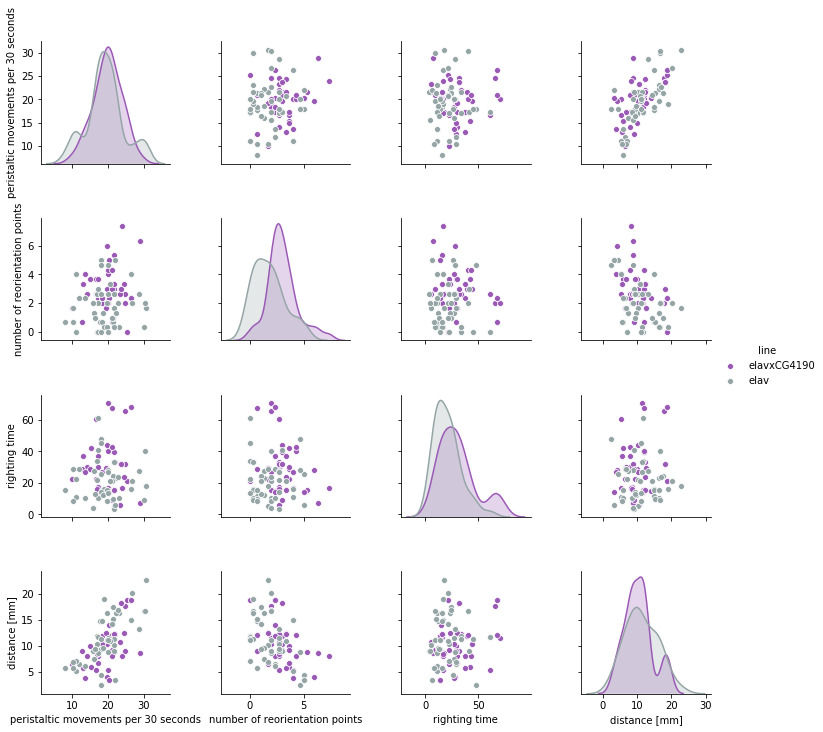

In [9]:
sns.pairplot(means, hue="line", palette=palette);

In [ ]:
def hists():
    fig = plt.figure(figsize=(15,10))
    axes = fig.subplots(2, 2).flatten()
    for i, y in enumerate(exp):
        bins=10
        p = sns.distplot(means.loc[0:45, y],
            ax=axes[i],
            kde=True,
            #bins=bins,
            color="seagreen",
            kde_kws={"label": "elav x CG4190"});
        
        x = sns.distplot(means.loc[45:, y],
            ax=axes[i],
            kde=True,
            color="darkorange",
           # bins=bins,
            kde_kws={"label": "elav"});
        

hists()
#plt.savefig("behavioral_tests_hists_elav")